In [34]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [43]:
IMAGE_SIZE =[224,224]
train_path='face/train'
valid_path='face/validation'

In [44]:
#add preprocessing layer to the front of vgg
vgg = VGG16(input_shape=IMAGE_SIZE +[3],weights ='imagenet',include_top=False)
#dont train existing weight
for layer in vgg.layers:
    layer.trainable =False

In [45]:
#useful for getting no. of classes
folders = glob('face/train/*')

In [46]:
#adding layes
x= Flatten()(vgg.output)
prediction =Dense(len(folders),activation='softmax')(x)

In [47]:
#create model
model =Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [48]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(lr = 0.0001),
              metrics = ['accuracy']
             )

In [49]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen =ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)
training_set= train_datagen.flow_from_directory('face/train/',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set = test_datagen.flow_from_directory('face/validation/',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 16 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [50]:
#fitting model
r = model.fit_generator(
training_set,
validation_data=test_set,
epochs =5,
steps_per_epoch=len(training_set),
validation_steps=len(test_set))

Epoch 1/5
1/1 [==============================] - 24s 24s/step - loss: 1.2708 - accuracy: 0.2500 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 25s 25s/step - loss: 0.5796 - accuracy: 0.7500 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 27s 27s/step - loss: 0.4353 - accuracy: 0.8750 - val_loss: 0.6585 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 23s 23s/step - loss: 0.3448 - accuracy: 0.8750 - val_loss: 0.6401 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 25s 25s/step - loss: 0.2822 - accuracy: 0.8750 - val_loss: 0.6455 - val_accuracy: 0.5000


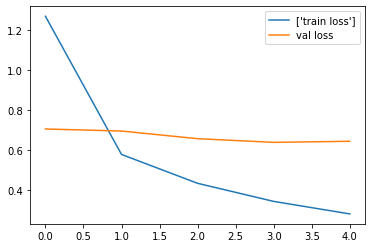

<Figure size 432x288 with 0 Axes>

In [51]:
#loss
plt.plot(r.history['loss'],label=['train loss'])
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')


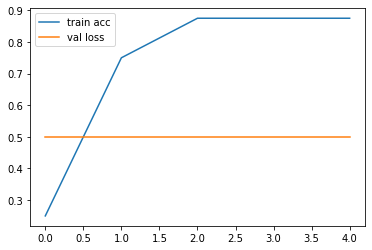

<Figure size 432x288 with 0 Axes>

In [52]:
#accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [53]:
import tensorflow as tf

from keras.models import load_model
model.save("faceRecognition_model.h5")

In [54]:
from keras.models import load_model
m = load_model('faceRecognition_model.h5')



In [81]:
new_image = image.load_img('prince53.jpg',target_size=(224,224))

In [82]:
type(new_image)

PIL.Image.Image

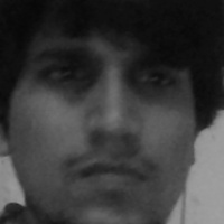

In [83]:
new_image

In [84]:
new_image1 =image.img_to_array(new_image)

In [85]:
new_img =np.expand_dims(new_image1,axis=0)

In [86]:
new_img.shape

(1, 224, 224, 3)

In [87]:
result=m.predict(new_img)


In [88]:
result

array([[0.00525635, 0.9947437 ]], dtype=float32)